![Agriculture Chart](agri_analysis.jpeg)

## Import library

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json
import pymysql



## Data import

In [2]:
df=pd.read_csv("C://Users//Admin//Documents//Guvi//MDTM38//project//AgriData_pre//ICRISAT-District Level Data - ICRISAT-District Level Data.csv")
pd.set_option("display.max_columns", None)
df.head()

Dist Code  Year  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1  1966          14  Chhattisgarh      Durg                548.0   
1          1  1967          14  Chhattisgarh      Durg                547.0   
2          1  1968          14  Chhattisgarh      Durg                556.3   
3          1  1969          14  Chhattisgarh      Durg                563.4   
4          1  1970          14  Chhattisgarh      Durg                571.6   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                        185.0                  337.59                  44.0   
1                        409.0                  747.71                  50.0   
2                        468.0                  841.27                  53.7   
3                        400.8                  711.40                  49.4   
4                        473.6                  828.55                  44.2   

   WHEAT PRODUCTION (1000 tons)  WHEAT YIELD (Kg per ha)  \
0                          20.0                   454.55   
1                          26.0                   520.00   
2                          30.0                   558.66   
3                          26.5                   536.44   
4                          29.0                   656.11   

   KHARIF SORGHUM AREA (1000 ha)  KHARIF SORGHUM PRODUCTION (1000 tons)  \
0                            0.6                                    0.4   
1                            1.1                                    0.9   
2                            0.5                                    0.4   
3                            0.8                                    0.6   
4                            0.9                                    0.6   

   KHARIF SORGHUM YIELD (Kg per ha)  RABI SORGHUM AREA (1000 ha)  \
0                            666.67                          0.0   
1                            818.18                          0.0   
2                            800.00                          0.0   
3                            750.00                          0.0   
4                            666.67                          0.0   

   RABI SORGHUM PRODUCTION (1000 tons)  RABI SORGHUM YIELD (Kg per ha)  \
0                                  0.0                             0.0   
1                                  0.0                             0.0   
2                                  0.0                             0.0   
3                                  0.0                             0.0   
4                                  0.0                             0.0   

   SORGHUM AREA (1000 ha)  SORGHUM PRODUCTION (1000 tons)  \
0                     0.6                             0.4   
1                     1.1                             0.9   
2                     0.5                             0.4   
3                     0.8                             0.6   
4                     0.9                             0.6   

   SORGHUM YIELD (Kg per ha)  PEARL MILLET AREA (1000 ha)  \
0                     666.67                          0.0   
1                     818.18                          0.0   
2                     800.00                          0.0   
3                     750.00                          0.0   
4                     666.67                          0.0   

   PEARL MILLET PRODUCTION (1000 tons)  PEARL MILLET YIELD (Kg per ha)  \
0                                  0.0                             0.0   
1                                  0.0                             0.0   
2                                  0.0                             0.0   
3                                  0.0                             0.0   
4                                  0.0                             0.0   

   MAIZE AREA (1000 ha)  MAIZE PRODUCTION (1000 tons)  \
0                   3.0                           2.0   
1                   3.0                           3.0   
2                   2.8        

## Data Cleaning

In [3]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

def clean_column_name(col_name):
    # Remove patterns like (1000_ha), (1000_tons), (kg_per_ha)
    cleaned_name = re.sub(r"_\(\d+_[a-zA-Z]+\)|_\([a-zA-Z]+_[a-zA-Z]+_[a-zA-Z]+\)", "", col_name)
    
# Add appropriate suffix
    if "area" in col_name:
        return cleaned_name + "_ha"
    elif "production" in col_name:
        return cleaned_name + "_tons"
    elif "yield" in col_name:
        return cleaned_name + "_ha"
    else:
        return cleaned_name  # Default case


# Apply to DataFrame columns
df.columns = [clean_column_name(col) for col in df.columns]
df.columns

Index(['dist_code', 'year', 'state_code', 'state_name', 'dist_name',
       'rice_area_ha', 'rice_production_tons', 'rice_yield_ha',
       'wheat_area_ha', 'wheat_production_tons', 'wheat_yield_ha',
       'kharif_sorghum_area_ha', 'kharif_sorghum_production_tons',
       'kharif_sorghum_yield_ha', 'rabi_sorghum_area_ha',
       'rabi_sorghum_production_tons', 'rabi_sorghum_yield_ha',
       'sorghum_area_ha', 'sorghum_production_tons', 'sorghum_yield_ha',
       'pearl_millet_area_ha', 'pearl_millet_production_tons',
       'pearl_millet_yield_ha', 'maize_area_ha', 'maize_production_tons',
       'maize_yield_ha', 'finger_millet_area_ha',
       'finger_millet_production_tons', 'finger_millet_yield_ha',
       'barley_area_ha', 'barley_production_tons', 'barley_yield_ha',
       'chickpea_area_ha', 'chickpea_production_tons', 'chickpea_yield_ha',
       'pigeonpea_area_ha', 'pigeonpea_production_tons', 'pigeonpea_yield_ha',
       'minor_pulses_area_ha', 'minor_pulses_production_tons

In [4]:
df.shape

(16146, 80)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   dist_code                             16146 non-null  int64  
 1   year                                  16146 non-null  int64  
 2   state_code                            16146 non-null  int64  
 3   state_name                            16146 non-null  object 
 4   dist_name                             16146 non-null  object 
 5   rice_area_ha                          16146 non-null  float64
 6   rice_production_tons                  16146 non-null  float64
 7   rice_yield_ha                         16146 non-null  float64
 8   wheat_area_ha                         16146 non-null  float64
 9   wheat_production_tons                 16146 non-null  float64
 10  wheat_yield_ha                        16146 non-null  float64
 11  kharif_sorghum_

In [6]:
pd.set_option("display.max_rows", None)
df.isnull().sum()

dist_code                               0
year                                    0
state_code                              0
state_name                              0
dist_name                               0
rice_area_ha                            0
rice_production_tons                    0
rice_yield_ha                           0
wheat_area_ha                           0
wheat_production_tons                   0
wheat_yield_ha                          0
kharif_sorghum_area_ha                  0
kharif_sorghum_production_tons          0
kharif_sorghum_yield_ha                 0
rabi_sorghum_area_ha                    0
rabi_sorghum_production_tons            0
rabi_sorghum_yield_ha                   0
sorghum_area_ha                         0
sorghum_production_tons                 0
sorghum_yield_ha                        0
pearl_millet_area_ha                    0
pearl_millet_production_tons            0
pearl_millet_yield_ha                   0
maize_area_ha                     

In [7]:
df.describe(include="all")

dist_code          year    state_code     state_name dist_name  \
count   16146.000000  16146.000000  16146.000000          16146     16146   
unique           NaN           NaN           NaN             20       311   
top              NaN           NaN           NaN  Uttar Pradesh      Durg   
freq             NaN           NaN           NaN           2392        52   
mean      269.769231   1991.496841      9.568562            NaN       NaN   
std       278.309125     15.011185      4.988538            NaN       NaN   
min         1.000000   1966.000000      1.000000            NaN       NaN   
25%        78.000000   1978.000000      6.000000            NaN       NaN   
50%       156.000000   1991.000000     10.000000            NaN       NaN   
75%       241.000000   2005.000000     12.000000            NaN       NaN   
max       917.000000   2017.000000     20.000000            NaN       NaN   

        rice_area_ha  rice_production_tons  rice_yield_ha  wheat_area_ha  \
count   16146.000000          16146.000000   16146.000000   16146.000000   
unique           NaN                   NaN            NaN            NaN   
top              NaN                   NaN            NaN            NaN   
freq             NaN                   NaN            NaN            NaN   
mean      128.593192            224.889565    1486.924784      77.057946   
std       160.078825            326.629828     956.185281     100.394479   
min        -1.000000             -1.000000      -1.000000      -1.000000   
25%        10.400000              9.460000     800.000000       1.770000   
50%        66.800000             95.840000    1333.210000      36.800000   
75%       191.390000            315.715000    2113.517500     123.000000   
max      1154.230000           3215.010000    5653.830000     879.490000   

        wheat_production_tons  wheat_yield_ha  kharif_sorghum_area_ha  \
count            16146.000000    16146.000000            16146.000000   
unique                    NaN             NaN                     NaN   
top                       NaN             NaN                     NaN   
freq                      NaN             NaN                     NaN   
mean               182.012746     1492.419859               22.632268   
std                348.834254     1081.255367               45.062714   
min                 -1.000000       -1.000000               -1.000000   
25%                  2.000000      750.000000                0.000000   
50%                 42.700000     1347.450000                2.050000   
75%                215.192500     2131.580000               20.900000   
max               4305.500000     5541.520000              334.800000   

        kharif_sorghum_production_tons  kharif_sorghum_yield_ha  \
count                     16146.000000             16146.000000   
unique                             NaN                      NaN   
top                                NaN                      NaN   
freq                               NaN                      NaN   
mean                         18.358094               586.031073   
std                          44.453630               559.245874   
min                          -1.000000                -1.000000   
25%                           0.000000                 0.000000   
50%                           1.200000               544.925000   
75%                          14.100000               962.250000   
max                         604.700000              6531.250000   

        rabi_sorghum_area_ha  rabi_sorghum_production_tons  \
count           16146.000000                  16146.000000   
unique                   NaN                           NaN   
top                      NaN                           NaN   
freq                     NaN                           NaN   
mean               17.386122                     10.003391   
std                72.368364                     38.993770   
min                -1.000000                     -1.00000

In [8]:
assert pd.notnull(df).all().all()

In [9]:
assert pd.notnull(df.select_dtypes(include=["number"])).all().all()

In [10]:
assert (df.select_dtypes(include=['number']) >= 0).all().all()

AssertionError: 

In [11]:
# find the value less than 0.
(df.select_dtypes(include=['number']) < 0).sum()

dist_code                                  0
year                                       0
state_code                                 0
rice_area_ha                              22
rice_production_tons                      22
rice_yield_ha                             22
wheat_area_ha                             35
wheat_production_tons                     35
wheat_yield_ha                            35
kharif_sorghum_area_ha                    40
kharif_sorghum_production_tons            40
kharif_sorghum_yield_ha                   40
rabi_sorghum_area_ha                      40
rabi_sorghum_production_tons              40
rabi_sorghum_yield_ha                     40
sorghum_area_ha                           40
sorghum_production_tons                   40
sorghum_yield_ha                          40
pearl_millet_area_ha                      54
pearl_millet_production_tons              26
pearl_millet_yield_ha                     54
maize_area_ha                             28
maize_prod

In [12]:
#df[(df.select_dtypes(include=["number"])<0).any(axis=1)]
df[df.select_dtypes(include=['number']).lt(0).any(axis=1)].head()

dist_code  year  state_code    state_name dist_name  rice_area_ha  \
0           1  1966          14  Chhattisgarh      Durg         548.0   
1           1  1967          14  Chhattisgarh      Durg         547.0   
2           1  1968          14  Chhattisgarh      Durg         556.3   
52          2  1966          14  Chhattisgarh    Bastar         406.0   
53          2  1967          14  Chhattisgarh    Bastar         414.0   

    rice_production_tons  rice_yield_ha  wheat_area_ha  wheat_production_tons  \
0                  185.0         337.59           44.0                   20.0   
1                  409.0         747.71           50.0                   26.0   
2                  468.0         841.27           53.7                   30.0   
52                 261.0         642.86            2.0                    1.0   
53                 319.0         770.53            2.0                    1.0   

    wheat_yield_ha  kharif_sorghum_area_ha  kharif_sorghum_production_tons  \
0           454.55                     0.6                             0.4   
1           520.00                     1.1                             0.9   
2           558.66                     0.5                             0.4   
52          500.00                     4.9                             4.2   
53          500.00                     5.7                             4.6   

    kharif_sorghum_yield_ha  rabi_sorghum_area_ha  \
0                    666.67                   0.0   
1                    818.18                   0.0   
2                    800.00                   0.0   
52                   857.14                   0.0   
53                   807.02                   0.0   

    rabi_sorghum_production_tons  rabi_sorghum_yield_ha  sorghum_area_ha  \
0                            0.0                    0.0              0.6   
1                            0.0                    0.0              1.1   
2                            0.0                    0.0              0.5   
52                           0.0                    0.0              4.9   
53                           0.0                    0.0              5.7   

    sorghum_production_tons  sorghum_yield_ha  pearl_millet_area_ha  \
0                       0.4            666.67                   0.0   
1                       0.9            818.18                   0.0   
2                       0.4            800.00                   0.0   
52                      4.2            857.14                   0.0   
53                      4.6            807.02                   0.0   

    pearl_millet_production_tons  pearl_millet_yield_ha  maize_area_ha  \
0                            0.0                    0.0            3.0   
1                            0.0                    0.0            3.0   
2                            0.0                    0.0            2.8   
52                           0.0                    0.0           23.0   
53                           0.0                    0.0           24.0   

    maize_production_tons  maize_yield_ha  finger_millet_area_ha  \
0                     2.0          666.67                    0.8   
1                     3.0         1000.00                    0.9   
2                     2.0          714.29                    0.8   
52                   31.0         1347.83                   10.4   
53                   34.0         1416.67                   10.7   

    finger_millet_production_tons  finger_millet_yield_ha  barley_area_ha  \
0                             0.2                  250.00             0.1   
1                             0.2                  222.22             0.2   
2                             0.2                  250.00             0.2   
52                            2.3                  221.15             0.0   
53                            2.7                  252.34             0.0   

    barley_production_tons  barley_yield_ha  chickpea_area_ha  \
0                      0

In [13]:
# changing the negative values to nan
df[df.select_dtypes(include=["number"]) < 0] = np.nan

#filling the nan values with 0 
df.fillna(0, inplace=True)
df.isnull().sum()

dist_code                               0
year                                    0
state_code                              0
state_name                              0
dist_name                               0
rice_area_ha                            0
rice_production_tons                    0
rice_yield_ha                           0
wheat_area_ha                           0
wheat_production_tons                   0
wheat_yield_ha                          0
kharif_sorghum_area_ha                  0
kharif_sorghum_production_tons          0
kharif_sorghum_yield_ha                 0
rabi_sorghum_area_ha                    0
rabi_sorghum_production_tons            0
rabi_sorghum_yield_ha                   0
sorghum_area_ha                         0
sorghum_production_tons                 0
sorghum_yield_ha                        0
pearl_millet_area_ha                    0
pearl_millet_production_tons            0
pearl_millet_yield_ha                   0
maize_area_ha                     

In [14]:
assert pd.notnull(df).all().all()

In [15]:
assert pd.notnull(df.select_dtypes(include=["number"])).all().all()

In [16]:
assert (df.select_dtypes(include=['number']) >= 0).all().all()

In [17]:
df.describe(include="all")

dist_code          year    state_code     state_name dist_name  \
count   16146.000000  16146.000000  16146.000000          16146     16146   
unique           NaN           NaN           NaN             20       311   
top              NaN           NaN           NaN  Uttar Pradesh      Durg   
freq             NaN           NaN           NaN           2392        52   
mean      269.769231   1991.496841      9.568562            NaN       NaN   
std       278.309125     15.011185      4.988538            NaN       NaN   
min         1.000000   1966.000000      1.000000            NaN       NaN   
25%        78.000000   1978.000000      6.000000            NaN       NaN   
50%       156.000000   1991.000000     10.000000            NaN       NaN   
75%       241.000000   2005.000000     12.000000            NaN       NaN   
max       917.000000   2017.000000     20.000000            NaN       NaN   

        rice_area_ha  rice_production_tons  rice_yield_ha  wheat_area_ha  \
count   16146.000000          16146.000000   16146.000000   16146.000000   
unique           NaN                   NaN            NaN            NaN   
top              NaN                   NaN            NaN            NaN   
freq             NaN                   NaN            NaN            NaN   
mean      128.594554            224.890927    1486.926146      77.060113   
std       160.077726            326.628888     956.183161     100.392804   
min         0.000000              0.000000       0.000000       0.000000   
25%        10.400000              9.460000     800.000000       1.770000   
50%        66.800000             95.840000    1333.210000      36.800000   
75%       191.390000            315.715000    2113.517500     123.000000   
max      1154.230000           3215.010000    5653.830000     879.490000   

        wheat_production_tons  wheat_yield_ha  kharif_sorghum_area_ha  \
count            16146.000000    16146.000000            16146.000000   
unique                    NaN             NaN                     NaN   
top                       NaN             NaN                     NaN   
freq                      NaN             NaN                     NaN   
mean               182.014913     1492.422027               22.634745   
std                348.833120     1081.252374               45.061442   
min                  0.000000        0.000000                0.000000   
25%                  2.000000      750.000000                0.000000   
50%                 42.700000     1347.450000                2.050000   
75%                215.192500     2131.580000               20.900000   
max               4305.500000     5541.520000              334.800000   

        kharif_sorghum_production_tons  kharif_sorghum_yield_ha  \
count                     16146.000000             16146.000000   
unique                             NaN                      NaN   
top                                NaN                      NaN   
freq                               NaN                      NaN   
mean                         18.360572               586.033551   
std                          44.452578               559.243276   
min                           0.000000                 0.000000   
25%                           0.000000                 0.000000   
50%                           1.200000               544.925000   
75%                          14.100000               962.250000   
max                         604.700000              6531.250000   

        rabi_sorghum_area_ha  rabi_sorghum_production_tons  \
count           16146.000000                  16146.000000   
unique                   NaN                           NaN   
top                      NaN                           NaN   
freq                     NaN                           NaN   
mean               17.388600                     10.005868   
std                72.367752                     38.993102   
min                 0.000000                      0.00000

In [18]:
print(df.duplicated().sum())

0


In [19]:
df["year"].unique()

array([1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [20]:
df["year"].nunique()

52

In [21]:
df["state_name"].nunique()

20

In [22]:
df["state_name"].unique()

array(['Chhattisgarh', 'Madhya Pradesh', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Tamil Nadu', 'Maharashtra', 'Gujarat', 'Rajasthan',
       'Punjab', 'Haryana', 'Uttar Pradesh', 'Uttarakhand', 'Assam',
       'Himachal Pradesh', 'Kerala', 'Orissa', 'West Bengal', 'Bihar',
       'Jharkhand'], dtype=object)

## Data Visualization 

In [2]:
df=pd.read_csv("df.csv")
df.head(5)

dist_code  year  state_code    state_name dist_name  rice_area_ha  \
0          1  1966          14  Chhattisgarh      Durg         548.0   
1          1  1967          14  Chhattisgarh      Durg         547.0   
2          1  1968          14  Chhattisgarh      Durg         556.3   
3          1  1969          14  Chhattisgarh      Durg         563.4   
4          1  1970          14  Chhattisgarh      Durg         571.6   

   rice_production_tons  rice_yield_ha  wheat_area_ha  wheat_production_tons  \
0                 185.0         337.59           44.0                   20.0   
1                 409.0         747.71           50.0                   26.0   
2                 468.0         841.27           53.7                   30.0   
3                 400.8         711.40           49.4                   26.5   
4                 473.6         828.55           44.2                   29.0   

   ...  cotton_area_ha  cotton_production_tons  cotton_yield_ha  \
0  ...             0.0                     0.0              0.0   
1  ...             0.0                     0.0              0.0   
2  ...             0.0                     0.0              0.0   
3  ...             0.0                     0.0              0.0   
4  ...             0.0                     0.0              0.0   

   fruits_area_ha  vegetables_area_ha  fruits_and_vegetables_area_ha  \
0            5.95                6.64                          12.59   
1            5.77                7.24                          13.02   
2            5.41                7.40                          12.81   
3            5.52                7.16                          12.69   
4            5.45                7.19                          12.64   

   potatoes_area_ha  onion_area_ha  fodder_area_ha   Region  
0              0.01           0.60            0.47  Central  
1              0.01           0.56            1.23  Central  
2              0.10           0.58            1.02  Central  
3              0.01           0.56            0.84  Central  
4              0.02           0.52            0.42  Central  

[5 rows x 81 columns]

In [3]:
df.shape

(16146, 81)

### Rice

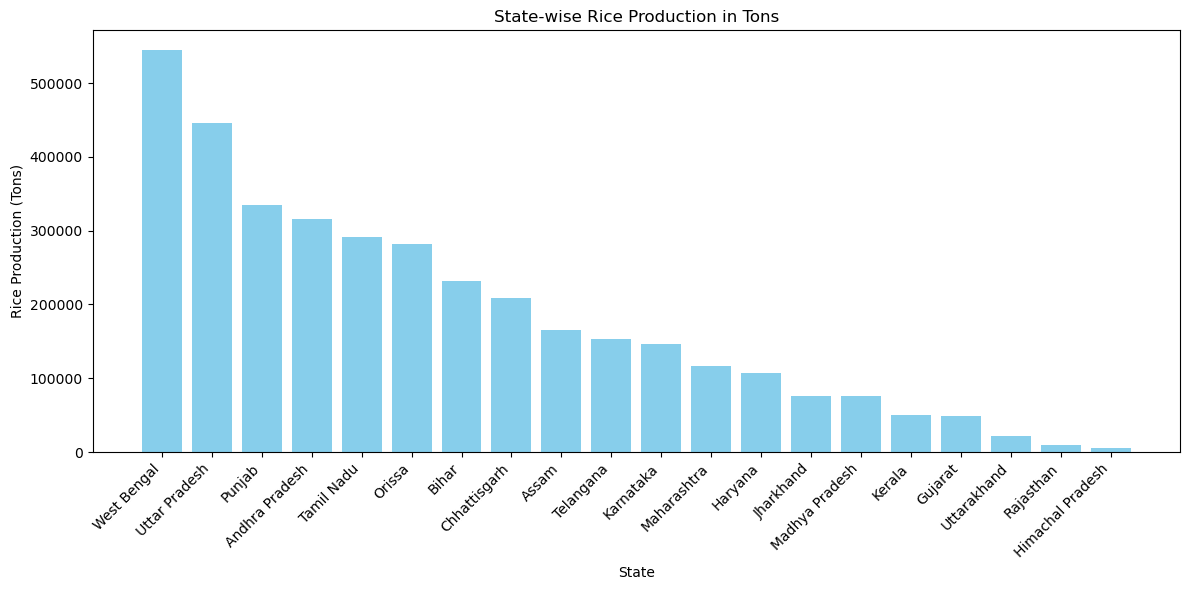

In [4]:
rice=df.groupby("state_name")["rice_production_tons"].sum()
rice_sorted = rice.sort_values(ascending=False)
plt.figure(figsize=(12, 6))  
plt.bar(rice_sorted.index, rice_sorted.values, color='skyblue')
plt.xlabel("State")
plt.ylabel("Rice Production (Tons)")
plt.title("State-wise Rice Production in Tons")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

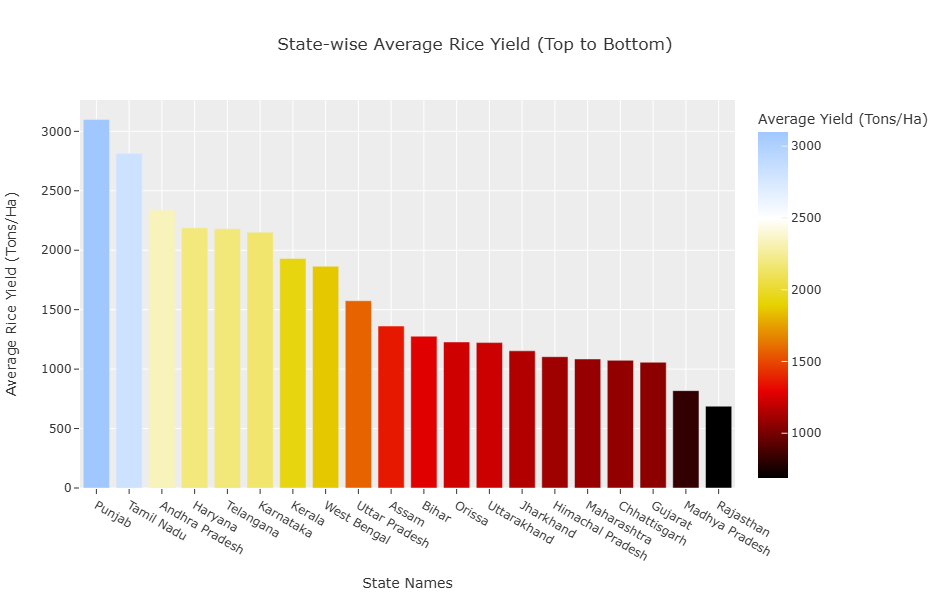

In [5]:
avg_yield_state = df.groupby("state_name")["rice_yield_ha"].mean().sort_values(ascending=False).reset_index()
avg_yield_state.columns = ['State Name', 'Average Rice Yield (Tons/Ha)']

fig = px.bar(avg_yield_state, 
             x='State Name', 
             y='Average Rice Yield (Tons/Ha)',
             title='State-wise Average Rice Yield (Top to Bottom)',
             labels={'State Name': 'State Name', 'Average Rice Yield (Tons/Ha)': 'Average Yield (Tons/Ha)'},
             color='Average Rice Yield (Tons/Ha)', 
             color_continuous_scale='blackbody')

# Layout tweaks
fig.update_layout(
    xaxis_title='State Names',
    yaxis_title='Average Rice Yield (Tons/Ha)',
    template='ggplot2',
    height=600,
    width=800
)

fig.show()

### Wheat

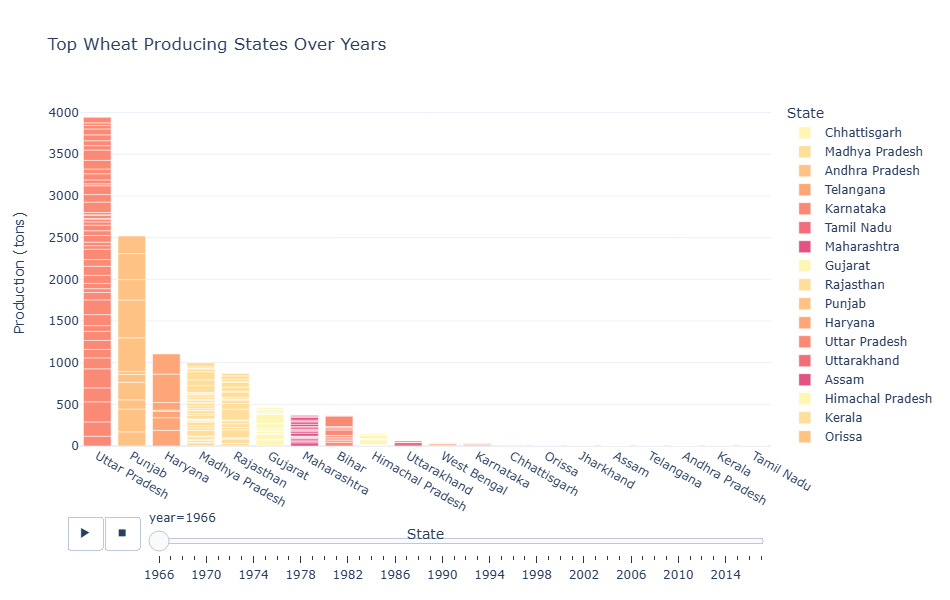

In [6]:
# top wheat production state year over year

fig = px.bar(
    df,
    x='state_name',
    y='wheat_production_tons',
    color='state_name',
    animation_frame='year',
    title='Top Wheat Producing States Over Years',
    labels={'wheat_production_tons': 'Production (tons)', 'state_name': 'State'},
    color_discrete_sequence=px.colors.sequential.Pinkyl  # 🌸 Pinkish tone
)

fig.update_layout(
    height=600, width=950,
    template='plotly_white',
    xaxis={'categoryorder':'total descending'},
    transition={'duration': 500}
)

fig.show()

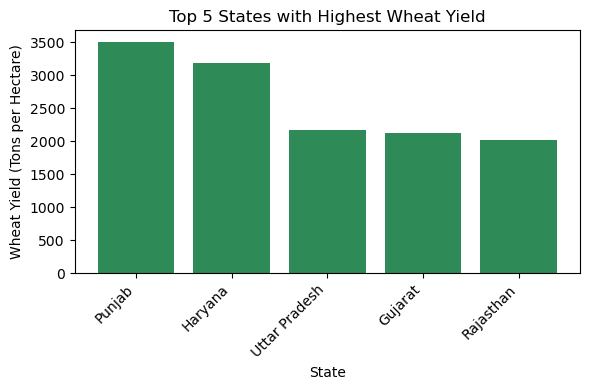

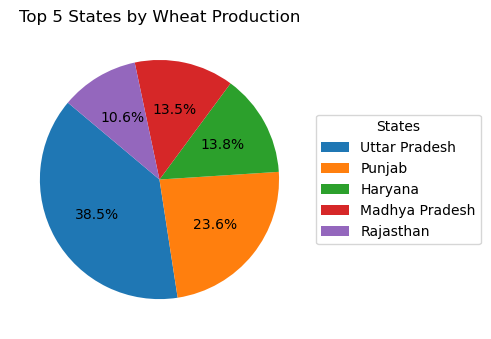

In [7]:
wheat_yield_state = df.groupby("state_name")["wheat_yield_ha"].mean().sort_values(ascending=False).head(5)

# Bar Chart for High Yield
plt.figure(figsize=(6, 4))
plt.bar(wheat_yield_state.index, wheat_yield_state.values, color='seagreen')
plt.xlabel("State")
plt.ylabel("Wheat Yield (Tons per Hectare)")
plt.title("Top 5 States with Highest Wheat Yield")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Total wheat production by state
wheat_production_state = df.groupby("state_name")["wheat_production_tons"].sum()
top_wheat_production = wheat_production_state.sort_values(ascending=False).head(5)

# Pie Chart
plt.figure(figsize=(5,5))
wedges, texts, autotexts = plt.pie(top_wheat_production.values, autopct='%1.1f%%', startangle=140)

# Legend for state names
plt.legend(wedges, top_wheat_production.index, title="States", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Top 5 States by Wheat Production")
plt.tight_layout()
plt.show()



### Oil Seed

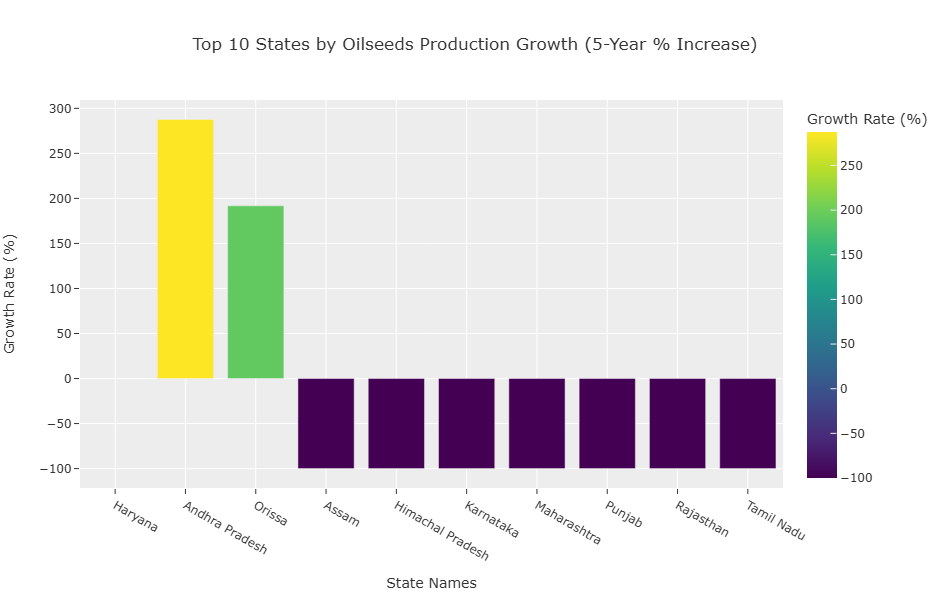

In [8]:
oil_growth = df.groupby(['state_name', 'year'])['oilseeds_production_tons'].sum().reset_index()
earliest_year = oil_growth['year'].min()
latest_year = oil_growth['year'].max()
earliest = oil_growth[oil_growth['year'] == earliest_year]
latest = oil_growth[oil_growth['year'] == latest_year]
merged = pd.merge(latest, earliest, on='state_name', suffixes=('_latest', '_earliest'))
merged['growth_rate'] = ((merged['oilseeds_production_tons_latest'] - merged['oilseeds_production_tons_earliest']) / merged['oilseeds_production_tons_earliest']) * 100
top_growth = merged.sort_values(by='growth_rate', ascending=False).head(10)

fig = px.bar(top_growth, 
             x='state_name', 
             y='growth_rate',
             title='Top 10 States by Oilseeds Production Growth (5-Year % Increase)',
             labels={'state_name': 'State Name', 'growth_rate': 'Growth Rate (%)'},
             color='growth_rate', 
             color_continuous_scale='viridis')

# Layout tweaks
fig.update_layout(
    xaxis_title='State Names',
    yaxis_title='Growth Rate (%)',
    template='ggplot2',
    height=600,
    width=800
)

fig.show()

### Maize

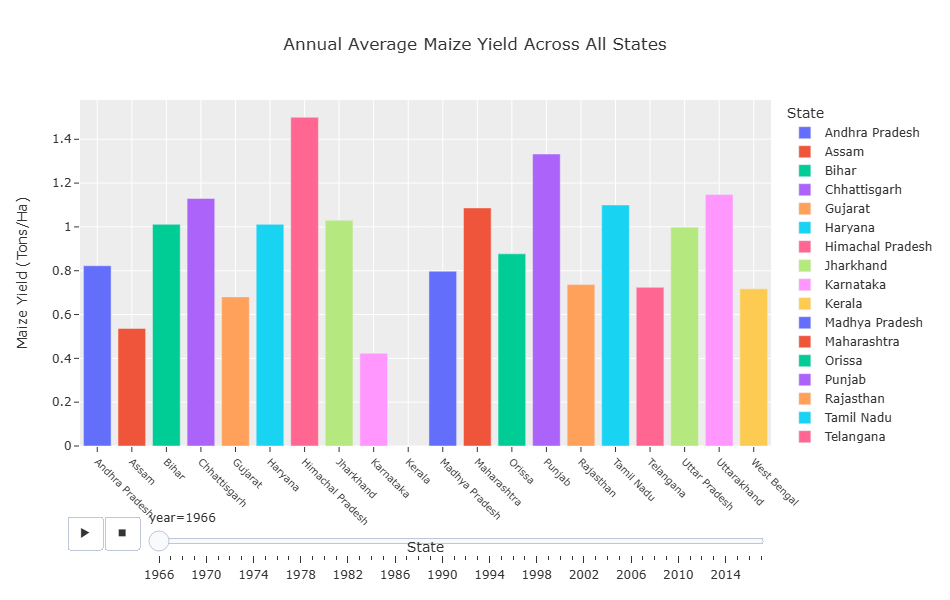

In [9]:
df['maize_yield'] = df['maize_production_tons'] / df['maize_area_ha']

avg_maize_yield = df.groupby(['year', 'state_name'])['maize_yield'].mean().reset_index()

fig = px.bar(avg_maize_yield,
             x='state_name',
             y='maize_yield',
             color='state_name',
             animation_frame='year',
             title='Annual Average Maize Yield Across All States',
             labels={'state_name': 'State', 'maize_yield': 'Maize Yield (Tons/Ha)'},
             range_y=[0, avg_maize_yield['maize_yield'].max() * 1.1])

fig.update_layout(template='ggplot2', height=600, width=900)
fig.update_xaxes(tickangle=45, tickfont=dict(size=10))
fig.show()


### Question

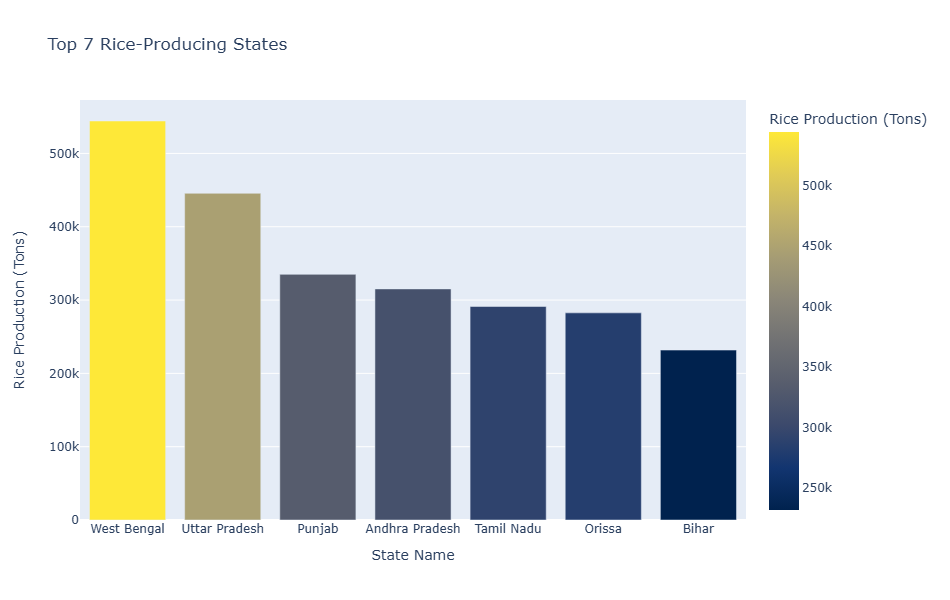

In [10]:
#1) Top 7 RICE PRODUCTION State Data(Bar_plot)

rice = df.groupby("state_name")["rice_production_tons"].sum()
rice_sorted = rice.sort_values(ascending=False).head(7).reset_index()

fig = px.bar(
    rice_sorted,
    x='state_name',
    y='rice_production_tons',
    title='Top 7 Rice-Producing States',
    labels={'state_name': 'State Name', 'rice_production_tons': 'Rice Production (Tons)'},
    color='rice_production_tons',
    color_continuous_scale='Cividis'
)

fig.update_layout(xaxis_title='State Name', yaxis_title='Rice Production (Tons)')
fig.update_layout(height=600, width=900)

fig.show()

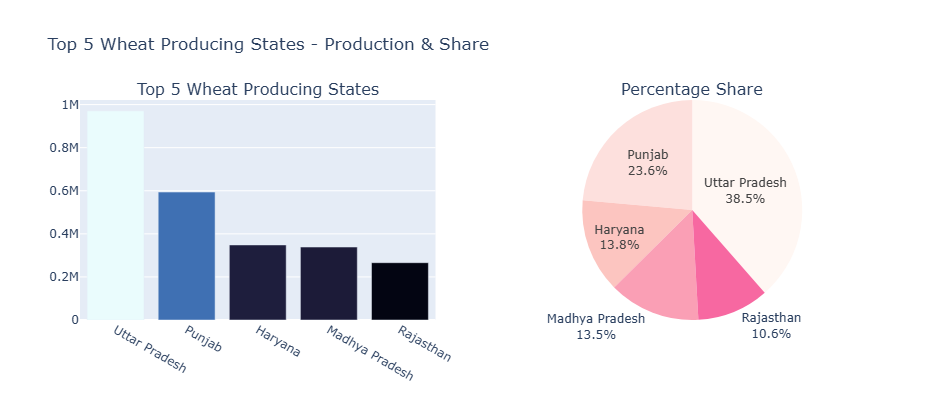

In [11]:
# 2) Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)

wheat = df.groupby("state_name")["wheat_production_tons"].sum()
top_wheat = wheat.sort_values(ascending=False).head(5).reset_index()

# Create subplot layout: 1 row, 2 columns
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Top 5 Wheat Producing States", "Percentage Share"),
    specs=[[{"type": "bar"}, {"type": "domain"}]]  # "domain" for pie chart
)


# Add Bar Chart
fig.add_trace(
    go.Bar(
        x=top_wheat['state_name'],
        y=top_wheat['wheat_production_tons'],
        marker=dict(color=top_wheat['wheat_production_tons'], colorscale='Ice'),
        name="Wheat Production"
    ),
    row=1, col=1
)

# Add Pie Chart
fig.add_trace(
    go.Pie(
        labels=top_wheat['state_name'],
        values=top_wheat['wheat_production_tons'],
        textinfo='percent+label',
        marker=dict(colors=px.colors.sequential.RdPu)
    ),
    row=1, col=2
)

# Layout and Titles
fig.update_layout(
    title_text="Top 5 Wheat Producing States - Production & Share",
    showlegend=False,
    height=400, width=900  # Size adjustment for side-by-side
)

# Show the combined figure
fig.show()

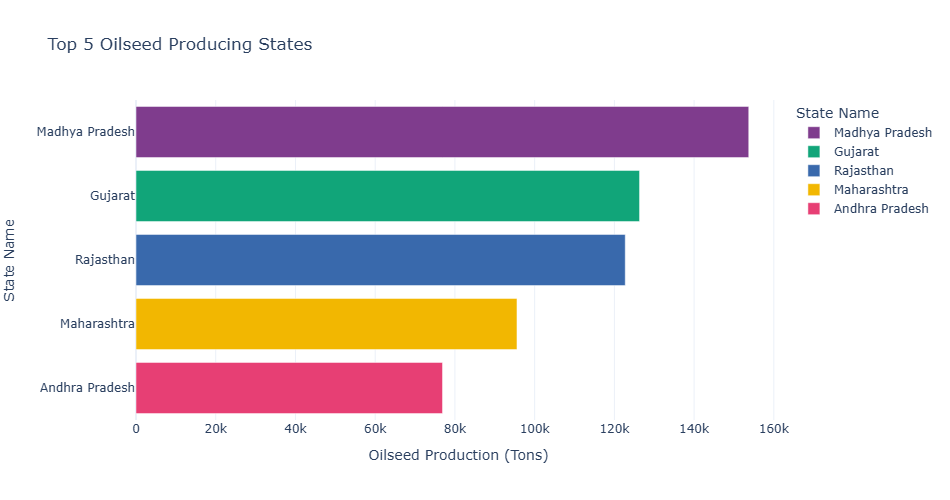

In [12]:
# 3) Oil seed production by top 5 states

oilseed = df.groupby("state_name")["oilseeds_production_tons"].sum()
top_oilseed = oilseed.sort_values(ascending=False).head(5).reset_index()

fig_bar = px.bar(
    top_oilseed,
    y='state_name',
    x='oilseeds_production_tons',
    orientation='h',
    title='Top 5 Oilseed Producing States',
    labels={'state_name': 'State Name', 'oilseeds_production_tons': 'Oilseed Production (Tons)'},
    color='state_name',  # Each bar a different color
    color_discrete_sequence=px.colors.qualitative.Bold  # 🎨 Vibrant colors
)

fig_bar.update_layout(xaxis_title='Oilseed Production (Tons)', yaxis_title='State Name', height=500, width=900, 
                      template='plotly_white')
fig_bar.show()

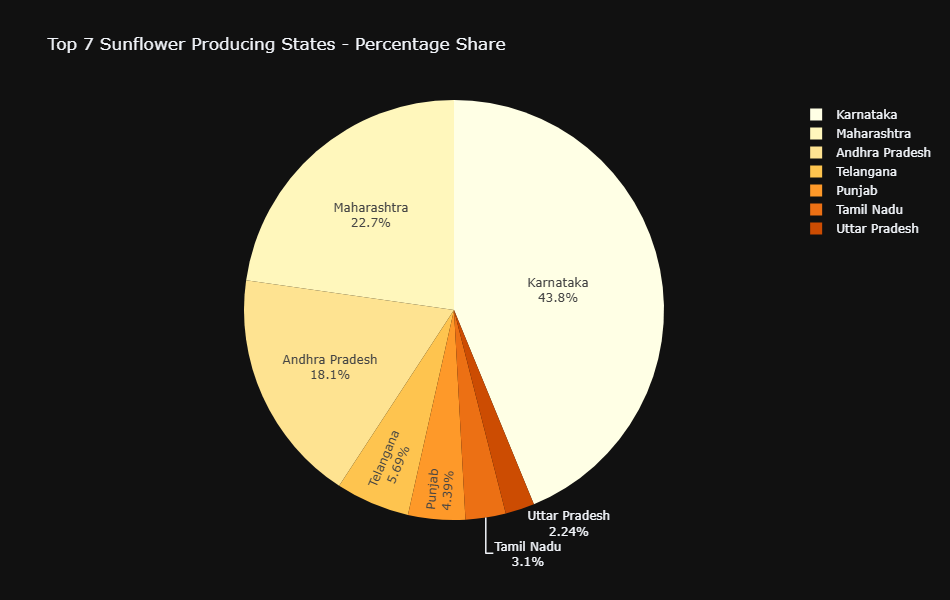

In [13]:
# 4) Top 7 SUNFLOWER PRODUCTION  State

sunflower= df.groupby("state_name")["sunflower_production_tons"].sum()
top_sunflower=sunflower.sort_values(ascending=False).head(7).reset_index()

fig_pie = px.pie(
    top_sunflower,
    names='state_name',
    values='sunflower_production_tons',
    title='Top 7 Sunflower Producing States - Percentage Share',
    color_discrete_sequence=px.colors.sequential.YlOrBr  
)

fig_pie.update_traces(textinfo='percent+label')
fig_pie.update_layout(height=600, width=900,template='plotly_dark')
fig_pie.show()

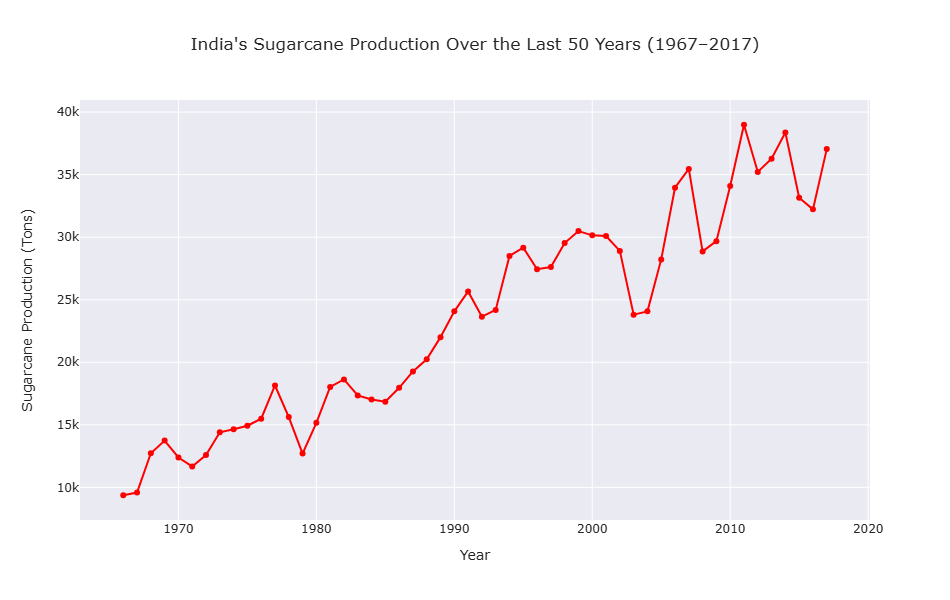

In [14]:
# 5) India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
sugarcane_yearly = df.groupby("year")["sugarcane_production_tons"].sum().reset_index()

fig = px.line(sugarcane_yearly,
              x='year',
              y='sugarcane_production_tons',
              markers=True,
              title="India's Sugarcane Production Over the Last 50 Years (1967–2017)",
              labels={'year': 'Year', 'sugarcane_production_tons': 'Sugarcane Production (Tons)'},
              line_shape='linear')

fig.update_traces(line=dict(color='red'))
fig.update_layout(template='seaborn', height=600, width=1000)
fig.show()

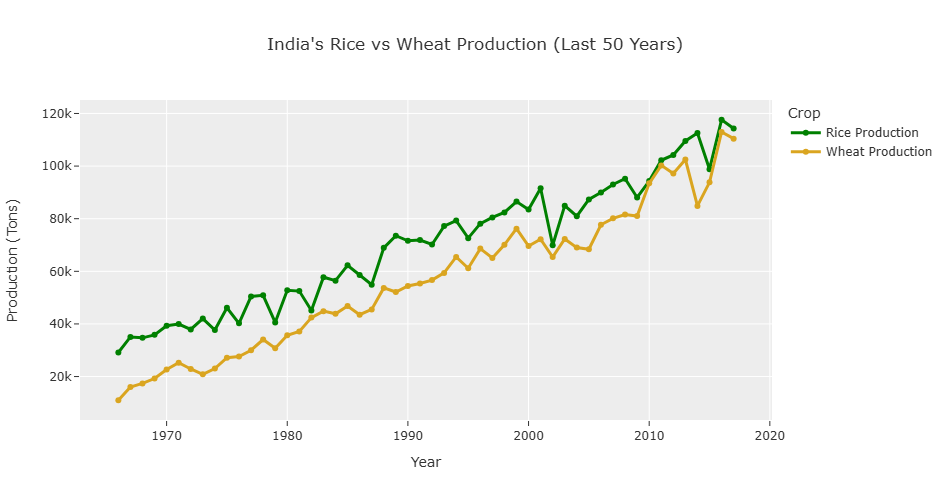

In [15]:
# 6) Rice Production Vs Wheat Production (Last 50y)

yearly_production = df.groupby("year")[["rice_production_tons", "wheat_production_tons"]].sum().reset_index()


fig = go.Figure()

# Rice Production Line
fig.add_trace(go.Scatter(
    x=yearly_production['year'],
    y=yearly_production['rice_production_tons'],
    mode='lines+markers',
    name='Rice Production',
    line=dict(color='green', width=3),
    marker=dict(size=6)
))

# Wheat Production Line
fig.add_trace(go.Scatter(
    x=yearly_production['year'],
    y=yearly_production['wheat_production_tons'],
    mode='lines+markers',
    name='Wheat Production',
    line=dict(color='goldenrod', width=3),
    marker=dict(size=6)
))

# Layout
fig.update_layout(
    title="India's Rice vs Wheat Production (Last 50 Years)",
    xaxis_title='Year',
    yaxis_title='Production (Tons)',
    legend_title='Crop',
    height=500, width=950,
    template='ggplot2'
)

fig.show()

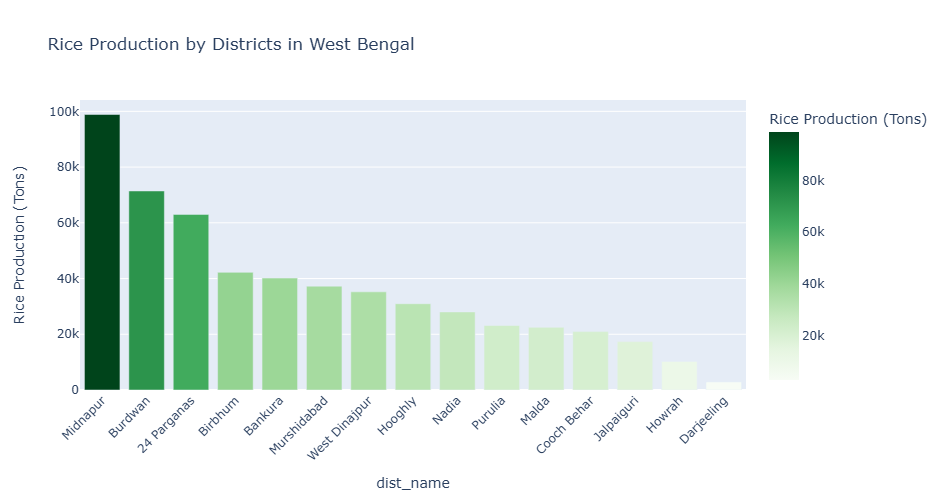

In [16]:
# 7) Rice Production By West Bengal Districts

wb_rice = df[df['state_name'] == 'West Bengal']
wb_rice_districts = wb_rice.groupby("dist_name")["rice_production_tons"].sum().reset_index()
wb_rice_districts = wb_rice_districts.sort_values(by='rice_production_tons', ascending=False)

fig = px.bar(
    wb_rice_districts,
    x='dist_name',
    y='rice_production_tons',
    title='Rice Production by Districts in West Bengal',
    labels={'district_name': 'District', 'rice_production_tons': 'Rice Production (Tons)'},
    color='rice_production_tons',
    color_continuous_scale='Greens'  
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=500,
    width=1000
)
fig.show()


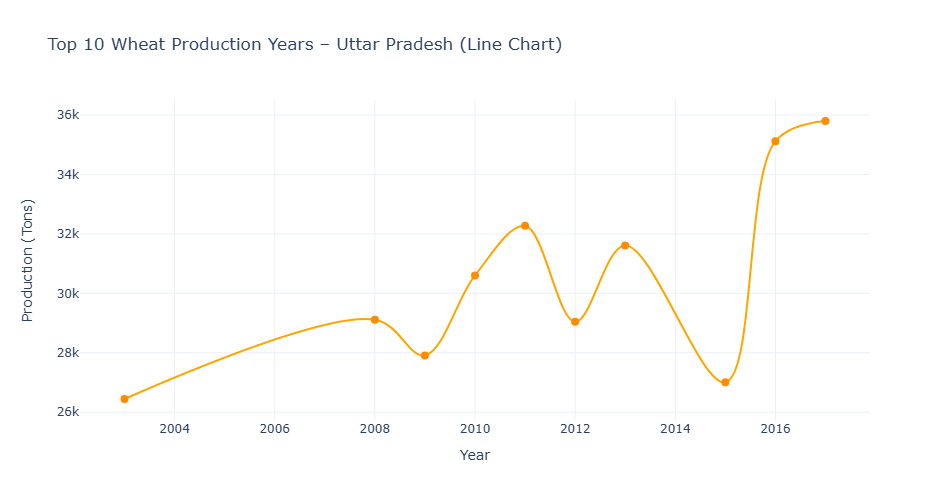

In [17]:
# 8) Top 10 Wheat Production Years From UP


up_wheat_production=df[df["state_name"]=="Uttar Pradesh"]
wheat_up = up_wheat_production.groupby("year")["wheat_production_tons"].sum().reset_index()

top10_wheat_years = wheat_up.sort_values(by='wheat_production_tons', ascending=False).head(10)
top10_wheat_years = top10_wheat_years.sort_values(by='year')

fig = px.line(
    top10_wheat_years,
    x='year',
    y='wheat_production_tons',
    title='Top 10 Wheat Production Years – Uttar Pradesh (Line Chart)',
    labels={'year': 'Year', 'wheat_production_tons': 'Wheat Production (Tons)'},
    markers=True,
    line_shape='spline',  
)


fig.update_traces(line_color='orange', marker=dict(color='darkorange', size=8))
fig.update_layout(
    height=500,
    width=1000,
    xaxis_title='Year',
    yaxis_title='Production (Tons)',
    template='plotly_white'
)

fig.show()

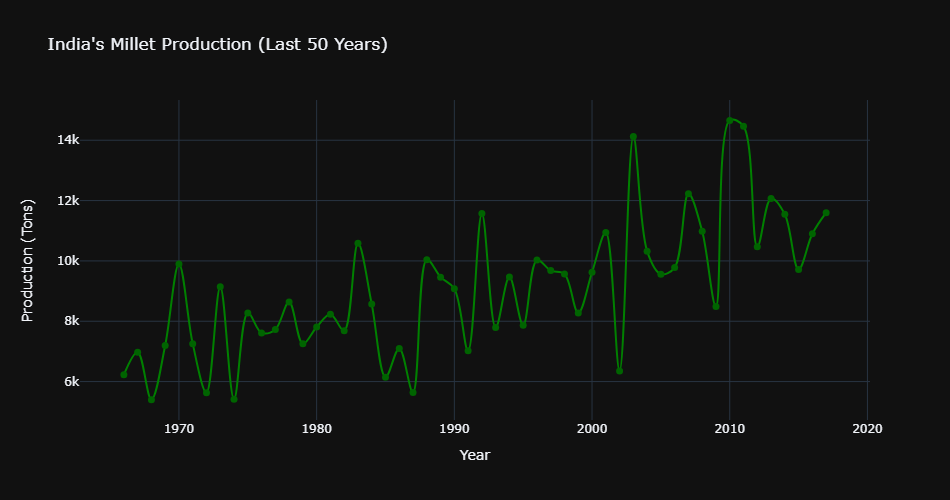

In [18]:
# 9) Millet Production (Last 50y)

pearl = df.groupby("year")["pearl_millet_production_tons"].sum().reset_index()
finger = df.groupby("year")["finger_millet_production_tons"].sum().reset_index()

millet = pd.merge(pearl, finger, on="year")
millet["Millet Production"] = (millet["pearl_millet_production_tons"] + millet["finger_millet_production_tons"])
millet_production = millet[["year", "Millet Production"]]


fig = px.line(
    millet_production,
    x='year',
    y='Millet Production',  # ✅ Use this column name
    title="India's Millet Production (Last 50 Years)",
    labels={'year': 'Year', 'Millet Production': 'Millet Production (Tons)'},
    markers=True,
    line_shape='spline'  # Smooth curve
)

# 🎨 Styling – Let’s go with a green theme 🌿
fig.update_traces(line_color='green', marker=dict(color='darkgreen', size=7))

fig.update_layout(
    height=500,
    width=1000,
    xaxis_title='Year',
    yaxis_title='Production (Tons)',
    template='plotly_dark'
)

fig.show()

In [19]:
# 10) Sorghum Production (Kharif and Rabi) by Region

def assign_region(state):
    if state in ['Punjab', 'Haryana', 'Uttar Pradesh', 'Uttarakhand', 'Himachal Pradesh']:
        return 'North'
    elif state in ['Tamil Nadu', 'Kerala', 'Karnataka', 'Andhra Pradesh', 'Telangana']:
        return 'South'
    elif state in ['Maharashtra', 'Gujarat', 'Rajasthan']:
        return 'West'
    elif state in ['West Bengal', 'Bihar', 'Orissa', 'Jharkhand', 'Assam']:
        return 'East'
    elif state in ['Madhya Pradesh', 'Chhattisgarh']:
        return 'Central'

df['Region'] = df['state_name'].apply(assign_region)


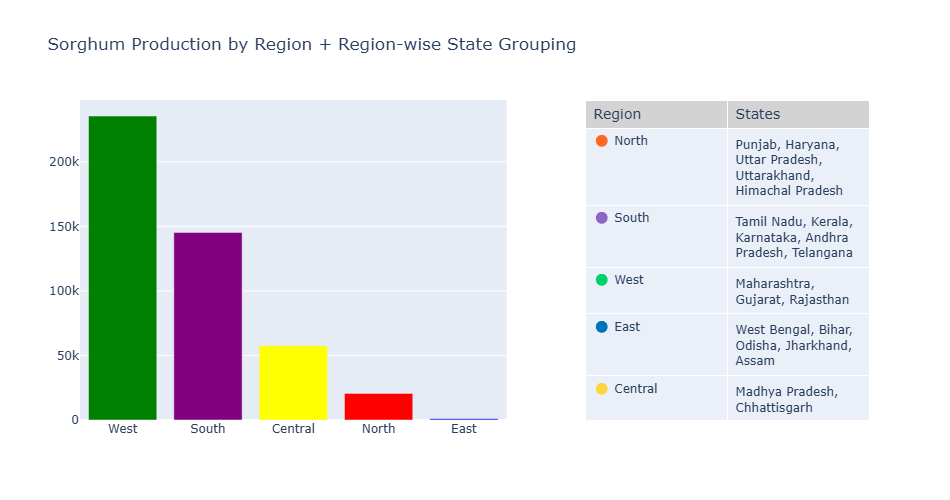

In [20]:
# 10) Sorghum Production (Kharif and Rabi) by Region

state_sorghum_production = df.groupby("state_name")["sorghum_production_tons"].sum().reset_index()
state_sorghum_production = state_sorghum_production.sort_values(by="sorghum_production_tons", ascending=False)

region_sorghum = df.groupby("Region")["sorghum_production_tons"].sum().reset_index()
region_sorghum = region_sorghum.sort_values(by="sorghum_production_tons", ascending=False)

region_colors = {
    "North": "red",
    "South": "purple", 
    "West": "green",
    "East": "blue",
    "Central": "yellow"
}
bar_colors = [region_colors[region] for region in region_sorghum['Region']]

# Create Subplots: 1 row, 2 columns
fig = make_subplots(rows=1, cols=2, column_widths=[0.6, 0.4], specs=[[{"type": "bar"}, {"type": "table"}]])

# Add Bar Chart
fig.add_trace(
    go.Bar(
        x=region_sorghum['Region'],
        y=region_sorghum['sorghum_production_tons'],
        marker_color=bar_colors,
        name='Sorghum Production'
    ),
    row=1, col=1
)

# Region-wise Grouping Table Data
region_table = [
    ["🟠 North", "Punjab, Haryana, Uttar Pradesh, Uttarakhand, Himachal Pradesh"],
    ["🟣 South", "Tamil Nadu, Kerala, Karnataka, Andhra Pradesh, Telangana"],
    ["🟢 West", "Maharashtra, Gujarat, Rajasthan"],
    ["🔵 East", "West Bengal, Bihar, Odisha, Jharkhand, Assam"],
    ["🟡 Central", "Madhya Pradesh, Chhattisgarh"]
]

# Add Region Info as Table
fig.add_trace(
    go.Table(
        header=dict(values=["Region", "States"], fill_color='lightgrey', font=dict(size=14), align='left'),
        cells=dict(values=list(zip(*region_table)), align='left', font=dict(size=12))
    ),
    row=1, col=2
)

# Layout Settings
fig.update_layout(
    title_text="Sorghum Production by Region + Region-wise State Grouping",
    height=500, width=1000
)

fig.show()

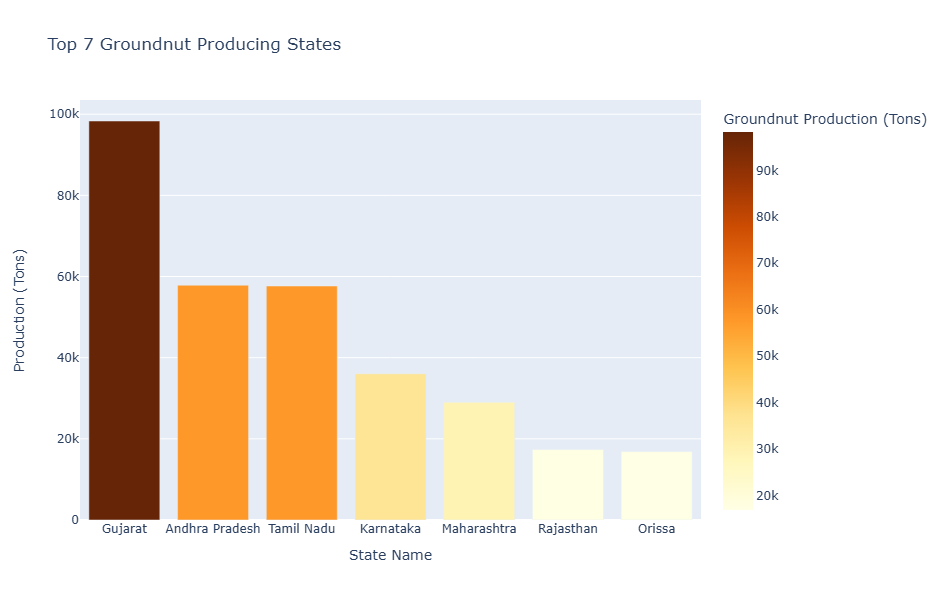

In [21]:
# 11) Top 7 States for Groundnut Production

groundnut = df.groupby("state_name")["groundnut_production_tons"].sum().reset_index()
top_groundnut = groundnut.sort_values(by="groundnut_production_tons", ascending=False).head(7)

fig_bar = px.bar(
    top_groundnut,
    x='state_name',
    y='groundnut_production_tons',
    title='Top 7 Groundnut Producing States',
    labels={'state_name': 'State Name', 'groundnut_production_tons': 'Groundnut Production (Tons)'},
    color='groundnut_production_tons',
    color_continuous_scale='YlOrBr' 
)

fig_bar.update_layout(xaxis_title='State Name', yaxis_title='Production (Tons)', height=600, width=1000)
fig_bar.show()

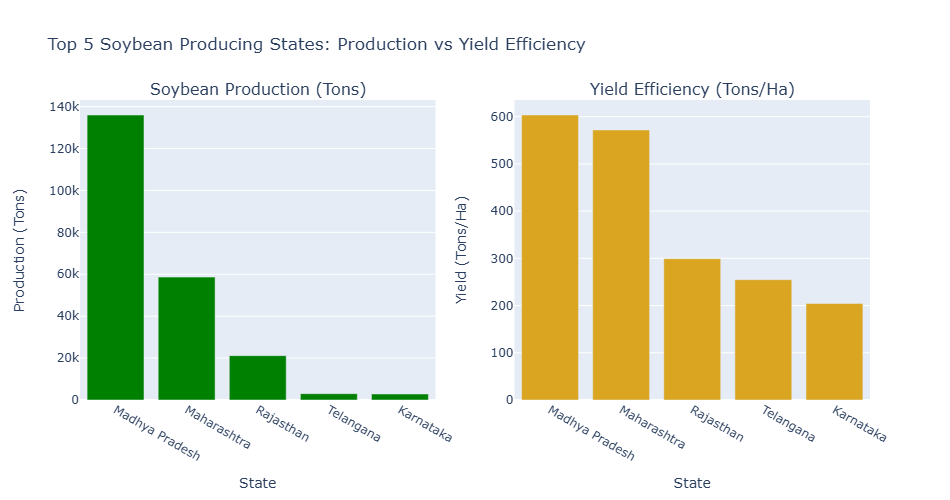

In [22]:
# 12) Soybean Production by Top 5 States and Yield Efficiency

soyabean_data = df.groupby("state_name").agg({"soyabean_production_tons": "sum","soyabean_yield_ha":"mean" }).reset_index()

soyabean_data.rename(columns={"soyabean_yield_ha": "yield_efficiency"}, inplace=True)
top_soyabean = soyabean_data.sort_values(by="soyabean_production_tons", ascending=False).head(5)

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Soybean Production (Tons)", "Yield Efficiency (Tons/Ha)")
)

fig.add_trace(go.Bar(
    x=top_soyabean["state_name"],
    y=top_soyabean["soyabean_production_tons"],
    name="Production",
    marker_color="green"
), row=1, col=1)

fig.add_trace(go.Bar(
    x=top_soyabean["state_name"],
    y=top_soyabean["yield_efficiency"],
    name="Yield Efficiency",
    marker_color="goldenrod"
), row=1, col=2)

fig.update_layout(
    title="Top 5 Soybean Producing States: Production vs Yield Efficiency",
    height=500,
    width=1000,
    showlegend=False
)

fig.update_xaxes(title_text="State", row=1, col=1)
fig.update_yaxes(title_text="Production (Tons)", row=1, col=1)

fig.update_xaxes(title_text="State", row=1, col=2)
fig.update_yaxes(title_text="Yield (Tons/Ha)", row=1, col=2)

fig.show()


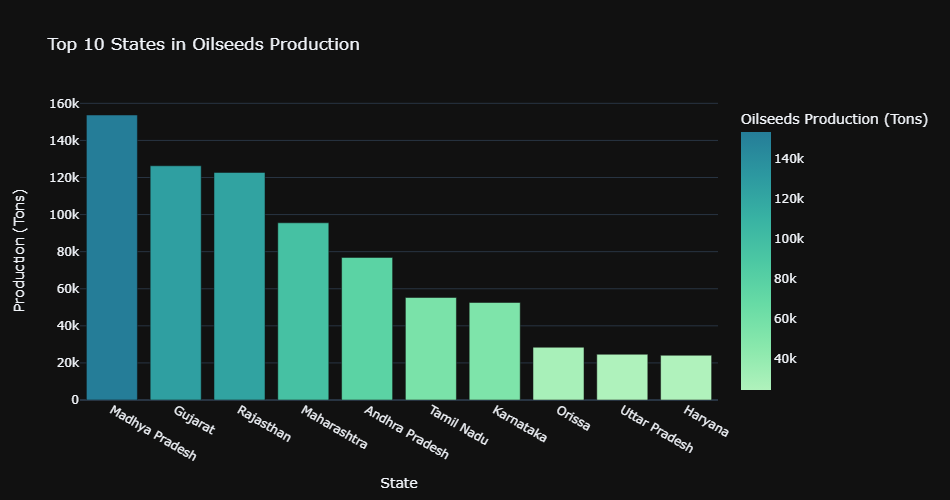

In [23]:
# 13) Oilseed Production in Major States

oilseeds_data = df.groupby("state_name")["oilseeds_production_tons"].sum().reset_index()
top_oilseeds = oilseeds_data.sort_values(by="oilseeds_production_tons", ascending=False).head(10)

# Step 3: Bar Chart
fig = px.bar(
    top_oilseeds,
    x='state_name',
    y='oilseeds_production_tons',
    title='Top 10 States in Oilseeds Production',
    labels={'state_name': 'State', 'oilseeds_production_tons': 'Oilseeds Production (Tons)'},
    color='oilseeds_production_tons',
    color_continuous_scale='Tealgrn'
)

# Layout settings
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Production (Tons)',
    template="plotly_dark",
    height=500,
    width=800
)

fig.show()


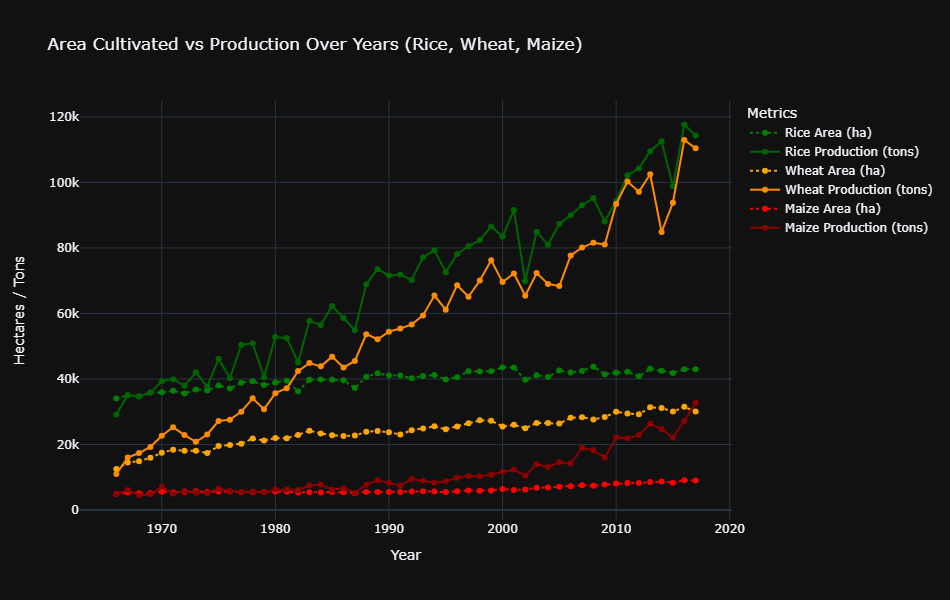

In [24]:
# 14) Impact of Area Cultivated on Production (Rice, Wheat, Maize)
area_prod = df.groupby("year").agg({
    "rice_area_ha": "sum",
    "rice_production_tons": "sum",
    "wheat_area_ha": "sum",
    "wheat_production_tons": "sum",
    "maize_area_ha": "sum",
    "maize_production_tons": "sum"
}).reset_index()

fig = go.Figure()

# Rice – Area & Production
fig.add_trace(go.Scatter(
    x=area_prod["year"], y=area_prod["rice_area_ha"],
    mode='lines+markers',
    name='Rice Area (ha)',
    line=dict(color='green', dash='dot')
))
fig.add_trace(go.Scatter(
    x=area_prod["year"], y=area_prod["rice_production_tons"],
    mode='lines+markers',
    name='Rice Production (tons)',
    line=dict(color='darkgreen')
))

# Wheat – Area & Production
fig.add_trace(go.Scatter(
    x=area_prod["year"], y=area_prod["wheat_area_ha"],
    mode='lines+markers',
    name='Wheat Area (ha)',
    line=dict(color='orange', dash='dot')
))
fig.add_trace(go.Scatter(
    x=area_prod["year"], y=area_prod["wheat_production_tons"],
    mode='lines+markers',
    name='Wheat Production (tons)',
    line=dict(color='darkorange')
))

fig.add_trace(go.Scatter(
    x=area_prod["year"], y=area_prod["maize_area_ha"],
    mode='lines+markers',
    name='Maize Area (ha)',
    line=dict(color='red', dash='dot') 
))
fig.add_trace(go.Scatter(
    x=area_prod["year"], y=area_prod["maize_production_tons"],
    mode='lines+markers',
    name='Maize Production (tons)',
    line=dict(color='darkred')  # 🔴 Changed to Dark Red Solid
))

# Layout Styling
fig.update_layout(
    title="Area Cultivated vs Production Over Years (Rice, Wheat, Maize)",
    xaxis_title="Year",
    yaxis_title="Hectares / Tons",
    template='plotly_dark',
    height=600,
    width=1000,
    legend_title="Metrics"
)

fig.show()

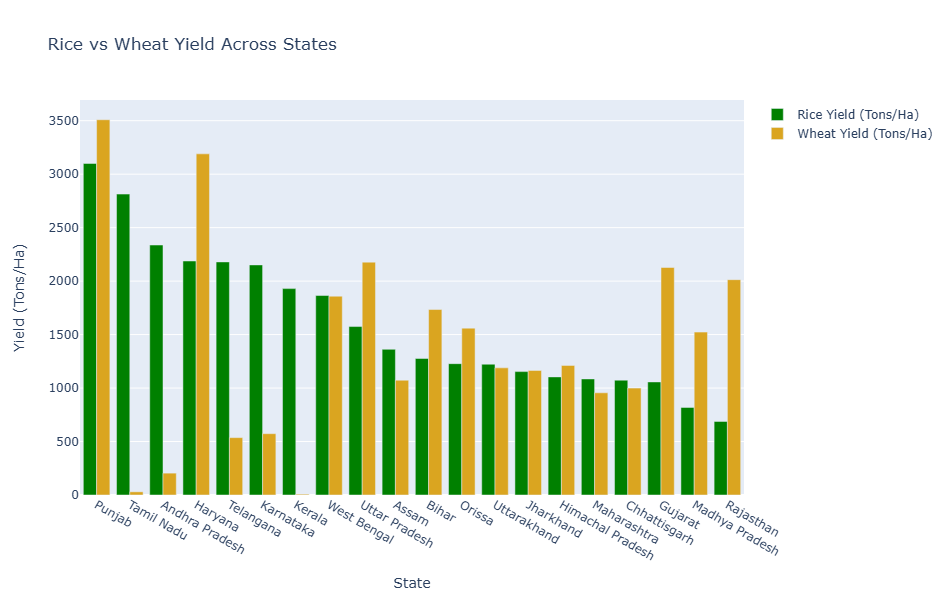

In [24]:
# 15) Rice vs. Wheat Yield Across States

yield_data = df.groupby("state_name")[["rice_yield_ha", "wheat_yield_ha"]].mean().reset_index()
yield_data = yield_data.sort_values(by="rice_yield_ha", ascending=False)

# Plot
fig = go.Figure()

fig.add_trace(go.Bar(
    x=yield_data["state_name"],
    y=yield_data["rice_yield_ha"],
    name="Rice Yield (Tons/Ha)",
    marker_color="green"
))

fig.add_trace(go.Bar(
    x=yield_data["state_name"],
    y=yield_data["wheat_yield_ha"],
    name="Wheat Yield (Tons/Ha)",
    marker_color="goldenrod"
))

fig.update_layout(
    title="Rice vs Wheat Yield Across States",
    xaxis_title="State",
    yaxis_title="Yield (Tons/Ha)",
    barmode='group',  
    height=600,
    width=1000
)

fig.show()

## Data export to mysql as csv

In [25]:
df_first = df.iloc[:, :5]
df_first = pd.concat([df[["Region"]], df_first], axis=1)
df_first.to_csv('df_info.csv', index=False)
df_first.head()

Region  dist_code  year  state_code    state_name dist_name
0  Central          1  1966          14  Chhattisgarh      Durg
1  Central          1  1967          14  Chhattisgarh      Durg
2  Central          1  1968          14  Chhattisgarh      Durg
3  Central          1  1969          14  Chhattisgarh      Durg
4  Central          1  1970          14  Chhattisgarh      Durg

In [26]:
df_rice = df.iloc[:, 4:]
df_rice.to_csv('df_crop.csv', index=False)
df_rice.head()

dist_name  rice_area_ha  rice_production_tons  rice_yield_ha  wheat_area_ha  \
0      Durg         548.0                 185.0         337.59           44.0   
1      Durg         547.0                 409.0         747.71           50.0   
2      Durg         556.3                 468.0         841.27           53.7   
3      Durg         563.4                 400.8         711.40           49.4   
4      Durg         571.6                 473.6         828.55           44.2   

   wheat_production_tons  wheat_yield_ha  kharif_sorghum_area_ha  \
0                   20.0          454.55                     0.6   
1                   26.0          520.00                     1.1   
2                   30.0          558.66                     0.5   
3                   26.5          536.44                     0.8   
4                   29.0          656.11                     0.9   

   kharif_sorghum_production_tons  kharif_sorghum_yield_ha  ...  \
0                             0.4                   666.67  ...   
1                             0.9                   818.18  ...   
2                             0.4                   800.00  ...   
3                             0.6                   750.00  ...   
4                             0.6                   666.67  ...   

   cotton_production_tons  cotton_yield_ha  fruits_area_ha  \
0                     0.0              0.0            5.95   
1                     0.0              0.0            5.77   
2                     0.0              0.0            5.41   
3                     0.0              0.0            5.52   
4                     0.0              0.0            5.45   

   vegetables_area_ha  fruits_and_vegetables_area_ha  potatoes_area_ha  \
0                6.64                          12.59              0.01   
1                7.24                          13.02              0.01   
2                7.40                          12.81              0.10   
3                7.16                          12.69              0.01   
4                7.19                          12.64              0.02   

   onion_area_ha  fodder_area_ha   Region  maize_yield  
0           0.60            0.47  Central     0.666667  
1           0.56            1.23  Central     1.000000  
2           0.58            1.02  Central     0.714286  
3           0.56            0.84  Central     0.851852  
4           0.52            0.42  Central     1.320000  

[5 rows x 78 columns]

## connect mysql to python

In [27]:
from sqlalchemy import create_engine
import pandas as pd

# Replace with your credentials
username = 'root'
password = '11111'
host = '127.0.0.1'
database = 'agri_data'

# Create engine
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")


In [28]:
# 1.Year-wise Trend of Rice Production Across States (Top 3)
query = """
SELECT 
    i.state_name,
    ROUND(SUM(c.rice_production_tons),2) AS total_rice_production
FROM df_crop c
JOIN df_info i 
    ON c.dist_name = i.dist_name AND c.Region = i.Region
GROUP BY i.state_name
ORDER BY total_rice_production DESC
LIMIT 3;"""

answer_1= pd.read_sql_query(query, engine)


query_1 = """
SELECT 
    i.state_name,
    i.year,
    ROUND(SUM(c.rice_production_tons),2) AS yearly_rice_production
FROM df_crop c
JOIN df_info i 
    ON c.dist_name = i.dist_name AND c.Region = i.Region
WHERE i.state_name IN ('UTTAR PRADESH','WEST BENGAL', 'PUNJAB')
GROUP BY i.state_name, i.year
ORDER BY i.state_name, i.year;"""
answer_1.b= pd.read_sql_query(query_1, engine)
print(answer_1.b)


      state_name  year  yearly_rice_production
0         Punjab  1966               335040.10
1         Punjab  1967               335040.10
2         Punjab  1968               335040.10
3         Punjab  1969               335040.10
4         Punjab  1970               335040.10
..           ...   ...                     ...
151  West Bengal  2013               544232.26
152  West Bengal  2014               544232.26
153  West Bengal  2015               544232.26
154  West Bengal  2016               544232.26
155  West Bengal  2017               544232.26

[156 rows x 3 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_16656\1544808015.py:27: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [29]:
# 2.Top 5 Districts by Wheat Yield Increase Over the Last 5 Years
query = """
WITH yield_data AS (
    SELECT 
        dist_name,
        year,
        wheat_yield_ha
    FROM df
    WHERE year IN (2012, 2017)
),

yield_year AS (
    SELECT 
        dist_name,
        MAX(CASE WHEN year = 2012 THEN wheat_yield_ha END) AS yield_2012,
        MAX(CASE WHEN year = 2017 THEN wheat_yield_ha END) AS yield_2017
    FROM yield_data
    GROUP BY dist_name
),

yield_diff AS (
    SELECT 
        dist_name,
        yield_2012,
        yield_2017,
        ROUND(yield_2017 - yield_2012, 2) AS yield_increase
    FROM yield_year
    WHERE yield_2012 IS NOT NULL AND yield_2017 IS NOT NULL
)

SELECT 
    dist_name,
    yield_2012,
    yield_2017,
    yield_increase
FROM yield_diff
ORDER BY yield_increase DESC
LIMIT 7;"""
answer_2 = pd.read_sql_query(query, engine)
print(answer_2 )


    dist_name   yield_2012   yield_2017  yield_increase
0     Vidisha  1754.099976  3900.000000         2145.90
1  Darjeeling  1172.589966  3011.629883         1839.04
2    Shajapur  2064.959961  3748.810059         1683.85
3       Damoh  2037.729980  3500.000000         1462.27
4    Warangal     0.000000  1428.569946         1428.57
5       Thane     0.000000  1419.349976         1419.35
6      Ujjain  3040.959961  4242.020020         1201.06


In [30]:
# 3.States with the Highest Growth in Oilseed Production (5-Year Growth Rate)
query = """
WITH oilseed_years AS (
    SELECT 
        state_name,
        year,
        ROUND(SUM(oilseeds_production_tons),2) AS total_production
    FROM df
    WHERE year IN (2012, 2017)
    GROUP BY state_name, year
),
pivot_production AS (
    SELECT 
        state_name,
        MAX(CASE WHEN year = 2012 THEN total_production END) AS prod_2012,
        MAX(CASE WHEN year = 2017 THEN total_production END) AS prod_2017
    FROM oilseed_years
    GROUP BY state_name
),
growth_calc AS (
    SELECT 
        state_name,
        prod_2012,
        prod_2017,
        ROUND(((prod_2017 - prod_2012) / NULLIF(prod_2012, 0)) * 100, 2) AS growth_rate_percent
    FROM pivot_production
    WHERE prod_2012 IS NOT NULL AND prod_2017 IS NOT NULL
)
SELECT 
    state_name,
    prod_2012,
    prod_2017,
    growth_rate_percent
FROM growth_calc
ORDER BY growth_rate_percent DESC
LIMIT 8; """
answer_3 = pd.read_sql_query(query, engine)
print(answer_3)


       state_name  prod_2012  prod_2017  growth_rate_percent
0  Andhra Pradesh    1988.28    2876.52                44.67
1         Haryana     930.00    1134.70                22.01
2          Orissa     689.87     535.34               -22.40
3    Chhattisgarh     223.94       0.00              -100.00
4       Telangana     806.62       0.00              -100.00
5       Karnataka     801.18       0.00              -100.00
6     Maharashtra    5159.94       0.00              -100.00
7         Gujarat    2854.89       0.00              -100.00


In [31]:
# 4.District-wise Correlation Between Area and Production for Major Crops (Rice, Wheat, and Maize)
query = """
WITH rice_corr AS (
    SELECT 
        dist_name,
        ROUND( 
            (SUM(rice_area_ha * rice_production_tons) - SUM(rice_area_ha) * SUM(rice_production_tons) / COUNT(*))
            /
            (SQRT(SUM(rice_area_ha * rice_area_ha) - POWER(SUM(rice_area_ha), 2) / COUNT(*)) *
             SQRT(SUM(rice_production_tons * rice_production_tons) - POWER(SUM(rice_production_tons), 2) / COUNT(*))),
            2
        ) AS rice_corr
    FROM df
    GROUP BY dist_name
),
wheat_corr AS (
    SELECT 
        dist_name,
        ROUND( 
            (SUM(wheat_area_ha * wheat_production_tons) - SUM(wheat_area_ha) * SUM(wheat_production_tons) / COUNT(*))
            /
            (SQRT(SUM(wheat_area_ha * wheat_area_ha) - POWER(SUM(wheat_area_ha), 2) / COUNT(*)) *
             SQRT(SUM(wheat_production_tons * wheat_production_tons) - POWER(SUM(wheat_production_tons), 2) / COUNT(*))),
            2
        ) AS wheat_corr
    FROM df
    GROUP BY dist_name
),
maize_corr AS (
    SELECT 
        dist_name,
        ROUND( 
            (SUM(maize_area_ha * maize_production_tons) - SUM(maize_area_ha) * SUM(maize_production_tons) / COUNT(*))
            /
            (SQRT(SUM(maize_area_ha * maize_area_ha) - POWER(SUM(maize_area_ha), 2) / COUNT(*)) *
             SQRT(SUM(maize_production_tons * maize_production_tons) - POWER(SUM(maize_production_tons), 2) / COUNT(*))),
            2
        ) AS maize_corr
    FROM df
    GROUP BY dist_name
)

SELECT 
    r.dist_name,
    r.rice_corr,
    w.wheat_corr,
    m.maize_corr
FROM rice_corr r
JOIN wheat_corr w ON r.dist_name = w.dist_name
JOIN maize_corr m ON r.dist_name = m.dist_name
ORDER BY r.dist_name;"""
answer_4= pd.read_sql_query(query, engine)
print(answer_4)

         dist_name  rice_corr  wheat_corr  maize_corr
0      24 Parganas       0.45        0.81        0.88
1         Adilabad       0.82        0.38        0.68
2             Agra       0.98        0.86        0.51
3        Ahmedabad       0.94        0.89        0.87
4       Ahmednagar       0.75        0.92        0.95
..             ...        ...         ...         ...
306       Warangal       0.94        0.85        0.95
307         Wardha       0.88        0.44        0.97
308  West Dinajpur       0.13        0.90        0.98
309  West Godavari       0.52        1.00        0.99
310        Yeotmal       0.87        0.89        0.91

[311 rows x 4 columns]


In [32]:
# 5.Yearly Production Growth of Cotton in Top 5 Cotton Producing States
query = """
WITH State_Cotton_Production AS (
    SELECT 
        i.state_name,
        i.year,
        ROUND(SUM(c.cotton_production_tons),2) AS cotton_prod
    FROM df_crop AS c
    JOIN df_info AS i ON c.dist_name = i.dist_name
    GROUP BY i.state_name, i.year
),
Top_States AS (
    SELECT 
        state_name,
        SUM(cotton_prod) AS total_cotton_prod
    FROM State_Cotton_Production
    GROUP BY state_name
    ORDER BY total_cotton_prod DESC
    LIMIT 5
)
SELECT 
    scp.state_name,
    scp.year,
    scp.cotton_prod
FROM State_Cotton_Production scp
JOIN Top_States ts ON scp.state_name = ts.state_name
ORDER BY scp.state_name, scp.year;
 """
answer_5= pd.read_sql_query(query, engine)
print(answer_5)


    state_name  year  cotton_prod
0      Gujarat  1966     31359.57
1      Gujarat  1967     31359.57
2      Gujarat  1968     31359.57
3      Gujarat  1969     31359.57
4      Gujarat  1970     31359.57
..         ...   ...          ...
255  Telangana  2013      9410.65
256  Telangana  2014      9410.65
257  Telangana  2015      9410.65
258  Telangana  2016      9410.65
259  Telangana  2017      9410.65

[260 rows x 3 columns]


In [33]:
# 6.Districts with the Highest Groundnut Production in 2017
query = """
SELECT 
    dist_name,
    groundnut_production_tons
FROM df
WHERE year = 2017
ORDER BY groundnut_production_tons DESC
LIMIT 10;
 """
answer_6 = pd.read_sql_query(query, engine)
print(answer_6)

               dist_name  groundnut_production_tons
0               Jamnagar                     977.65
1               Junagadh                     945.49
2                 Rajkot                     873.87
3                Bikaner                     514.09
4             Ananthapur                     454.94
5            Banaskantha                     288.21
6  North Arcot / Vellore                     280.51
7           Mahabubnagar                     273.25
8               Chittoor                     263.38
9            Sabarkantha                     244.48


In [34]:
# 7.Annual Average Maize Yield Across All States
query = """
SELECT 
    year,
    ROUND(AVG(maize_yield_ha), 2) AS avg_maize_yield
FROM df
GROUP BY year
ORDER BY year; """
answer_7 = pd.read_sql_query(query, engine)
print(answer_7 )


    year  avg_maize_yield
0   1966           734.27
1   1967           869.55
2   1968           709.30
3   1969           781.52
4   1970          1094.18
5   1971           848.64
6   1972           895.13
7   1973           886.84
8   1974           852.94
9   1975          1026.01
10  1976           966.65
11  1977           946.53
12  1978           964.88
13  1979           984.16
14  1980          1067.09
15  1981          1119.51
16  1982          1189.24
17  1983          1314.56
18  1984          1226.57
19  1985          1057.79
20  1986          1078.99
21  1987           945.44
22  1988          1145.88
23  1989          1324.73
24  1990          1235.36
25  1991          1157.02
26  1992          1450.82
27  1993          1345.81
28  1994          1211.29
29  1995          1344.00
30  1996          1443.18
31  1997          1409.27
32  1998          1419.08
33  1999          1516.95
34  2000          1556.49
35  2001          1758.42
36  2002          1384.69
37  2003    

In [35]:
# 8.Total Area Cultivated for Oilseeds in Each State
query = """
SELECT 
    state_name,
    ROUND(SUM(oilseeds_area_ha), 2) AS total_oilseeds_area_ha
FROM df
GROUP BY state_name
ORDER BY total_oilseeds_area_ha DESC;
 """
answer_8 = pd.read_sql_query(query, engine)
print(answer_8)


          state_name  total_oilseeds_area_ha
0     Madhya Pradesh               189945.92
1          Rajasthan               142433.47
2        Maharashtra               134069.16
3            Gujarat               130725.71
4          Karnataka                92527.23
5     Andhra Pradesh                87223.49
6         Tamil Nadu                56225.64
7      Uttar Pradesh                43047.07
8             Orissa                39682.05
9          Telangana                35293.43
10            Kerala                34424.94
11           Haryana                21465.54
12       West Bengal                20300.76
13      Chhattisgarh                17267.08
14             Assam                14176.64
15            Punjab                 8697.93
16             Bihar                 5547.29
17         Jharkhand                 2832.29
18       Uttarakhand                 1026.53
19  Himachal Pradesh                  809.25


In [36]:
# 9.Districts with the Highest Rice Yield
query = """
SELECT 
    dist_name,
    ROUND(SUM(rice_yield_ha), 2) AS sum_rice_yield_ha
FROM df_crop
GROUP BY dist_name
ORDER BY sum_rice_yield_ha DESC
LIMIT 10;"""
answer_9= pd.read_sql_query(query, engine)
print(answer_9)


      dist_name  sum_rice_yield_ha
0      Ludhiana          189822.57
1       Sangrur          183710.63
2  Thirunelveli          176150.29
3      Bhatinda          174884.26
4       Madurai          170403.08
5   Kanyakumari          168516.06
6      Ferozpur          168170.92
7       Patiala          167550.76
8     Jalandhar          165725.44
9         Salem          161334.34


In [37]:
# 10.Compare the Production of Wheat and Rice for the Top 5 States Over 10 Years
query = """
WITH State_Production AS (
    SELECT 
        i.state_name,
        i.year,
        ROUND(SUM(c.wheat_production_tons),2) AS wheat_prod,
        ROUND(SUM(c.rice_production_tons),2) AS rice_prod
    FROM df_crop AS c
    JOIN df_info AS i ON c.dist_name = i.dist_name
    WHERE i.year BETWEEN 2008 AND 2017
    GROUP BY i.state_name, i.year
),
Top_States AS (
    SELECT 
        state_name,
        ROUND(SUM(wheat_prod + rice_prod),2) AS total_prod
    FROM State_Production
    GROUP BY state_name
    ORDER BY total_prod DESC
    LIMIT 5
)
SELECT 
    sp.state_name,
    sp.year,
    sp.wheat_prod,
    sp.rice_prod
FROM State_Production sp
JOIN Top_States ts ON sp.state_name = ts.state_name
ORDER BY sp.state_name, sp.year;
 """
answer_10  = pd.read_sql_query(query, engine)
print(answer_10 )


        state_name  year  wheat_prod  rice_prod
0          Haryana  2008   348429.60  107664.90
1          Haryana  2009   348429.60  107664.90
2          Haryana  2010   348429.60  107664.90
3          Haryana  2011   348429.60  107664.90
4          Haryana  2012   348429.60  107664.90
5          Haryana  2013   348429.60  107664.90
6          Haryana  2014   348429.60  107664.90
7          Haryana  2015   348429.60  107664.90
8          Haryana  2016   348429.60  107664.90
9          Haryana  2017   348429.60  107664.90
10  Madhya Pradesh  2008   338644.25   76342.20
11  Madhya Pradesh  2009   338644.25   76342.20
12  Madhya Pradesh  2010   338644.25   76342.20
13  Madhya Pradesh  2011   338644.25   76342.20
14  Madhya Pradesh  2012   338644.25   76342.20
15  Madhya Pradesh  2013   338644.25   76342.20
16  Madhya Pradesh  2014   338644.25   76342.20
17  Madhya Pradesh  2015   338644.25   76342.20
18  Madhya Pradesh  2016   338644.25   76342.20
19  Madhya Pradesh  2017   338644.25   7